### 目标

- 了解 Python 下做数据分析的主要类库: Numpy, Pandas, Matplotlib

### 数据集

美国 1880 年到 2016 年美国新生儿上报名字的数据集

- Names from *US Social Security* from 1880 to 2016 : https://www.ssa.gov/oact/babynames/limits.html (National data)
    
    - 137 CSV files named *yobYYYY.txt*, without header
    - Within each file: name, gender (F or M), births (int)
    - No names when less that 5 occurences in a year
    
### 大纲

1. 用 Pandas 载入数据，并进行基本的数据探索
2. 数据的可视化
    1. 同一个名字在不同的年份使用的频率的变化
    2. 按年份展示新生儿男女比例的变化
3. 评估名字的多样性
4. 名字性别偏好的变迁
    
### 参考资料

- Wes McKinney - Python for Data Analysis - O'Reilly (2013)
- Jake VanderPlas - Python Data Science Handbook - O'Reilly (2016)

In [126]:
# 引入基本依赖
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

# magic command to display graphics within the notebook，这里可以先忽略
%matplotlib inline

# display options，这里可以先忽略
from pandas import set_option
set_option("display.max_rows", 16)
set_option("precision", 3)
plt.style.use('seaborn-notebook')

## 1. 加载数据


### 1.1 加载一年的数据

首先我们加载 2016 年的数据，数据格式为 CSV，我们采用 Pandas 类库的 `read_csv()` 加载。

In [127]:
path = "datasets/names/"
filename = "yob2016.txt"
us2016 = pd.read_csv(os.path.join(path, filename),
                           header=None,
                           names=['name', 'gender', 'births'])
us2016

,name,gender,births
0,Emma,F,19414
1,Olivia,F,19246
2,Ava,F,16237
3,Sophia,F,16070
4,Isabella,F,14722
5,Mia,F,14366
6,Charlotte,F,13030
7,Abigail,F,11699
...,...,...,...
32860,Ziya,M,5


上面这个东西叫做一个 `DataFrame` 可以理解为一个 Python 下的 Excel 表格，最上面有一个表头，左侧是索引，这里默认的就是行号。

In [128]:
type(us2016)

pandas.core.frame.DataFrame

In [129]:
# 查看这个 DataFrame 的概览信息
us2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32868 entries, 0 to 32867
Data columns (total 3 columns):
name      32868 non-null object
gender    32868 non-null object
births    32868 non-null int64
dtypes: int64(1), object(2)
memory usage: 770.4+ KB


In [130]:
# 查看这个 DataFrame 的索引信息
us2016.index

RangeIndex(start=0, stop=32868, step=1)

In [131]:
# 查看表头（columns）
us2016.columns

Index(['name', 'gender', 'births'], dtype='object')

In [132]:
# 查看维度
us2016.shape

(32868, 3)

可以看到这个表包含 32868 行，一共有 3 列

然后我们可以采用 `[]` 这个符号去访问具体某一列数据。

In [133]:
# access to a specific column
us2016['name']  # us2016.nam

0             Emma
1           Olivia
2              Ava
3           Sophia
4         Isabella
5              Mia
6        Charlotte
7          Abigail
           ...    
32860         Ziya
32861       Ziyang
32862         Zoel
32863       Zolton
32864       Zurich
32865       Zyahir
32866         Zyel
32867        Zylyn
Name: name, Length: 32868, dtype: object

In [134]:
type(us2016['name'])

pandas.core.series.Series

可以看到它是一个 `Series` 类型的数据结构，表示一个一维的数据，然后它和其所属的 `DataFrame` 共享同一个索引。

In [135]:
# 2016 年新生儿名字的个数，采用 nunique 剔除了重名
us2016['name'].nunique()

30294

** 针对 DataFrame 的一些基本操作: 排序（sorting） and 分组（grouping）**

一个 DataFrame 可以按照某一个或多个列进行排序：

In [136]:
# 2016 年新生儿名字 top 10
us2016.sort_values('births', ascending=False).head(10)

,name,gender,births
0,Emma,F,19414
1,Olivia,F,19246
18757,Noah,M,19015
18758,Liam,M,18138
2,Ava,F,16237
3,Sophia,F,16070
18759,William,M,15668
18760,Mason,M,15192
18761,James,M,14776
4,Isabella,F,14722


DataFrame `groupby()` 方法，将数据按照某一个字段分成不同的 group，然后再针对每个 group 进行具体的处理。例如这里展示了一个分组并累加的请场景：

In [137]:
us2016.groupby('gender').sum()

,births
gender,
F,1756647
M,1880674


### 1.2 加载所有数据

首先按照上面加载单个文件的方法一个个加载数据，然后把它们放进一个 List 中，最后采用 Pandas 提供的 `concat` 方法组合成一个大的 `DataFrame`。

In [138]:
years = range(1880, 2017)

pieces = []
columns = ['name', 'gender', 'births']

for year in years:
    path = f'datasets/names/yob{year}.txt'
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
us = pd.concat(pieces, ignore_index=True)
us

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
...,...,...,...,...
1891886,Ziya,M,5,2016


In [139]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891894 entries, 0 to 1891893
Data columns (total 4 columns):
name      object
gender    object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 57.7+ MB


In [140]:
us['name'].nunique()

96174

In [141]:
us.sort_values('births', ascending=False).head(10)

,name,gender,births,year
431059,Linda,F,99685,1947
441430,Linda,F,96210,1948
437162,James,M,94762,1947
544612,Michael,M,92716,1957
437163,Robert,M,91641,1947
451669,Linda,F,91013,1949
533150,Michael,M,90620,1956
556187,Michael,M,90512,1958
447469,James,M,88584,1948
510799,Michael,M,88525,1954


In [142]:
# global US female and male births
us.groupby('gender').sum()  # ['births']  # [['births']]

,births,year
gender,,
F,170639571,2211413526
M,173894326,1523416826


这里我们创建一个函数去获取全量数据下 top n 的名字是哪些。

In [143]:
# top (10) names all years
def top(df, size=10):
    return df.groupby(['name', 'gender']).sum()['births'].sort_values(ascending=False).head(size)

In [144]:
# global US top 10 names all years
top(us)

name     gender
James    M         5136026
John     M         5105834
Robert   M         4809176
Michael  M         4338144
Mary     F         4120692
William  M         4087525
David    M         3601032
Joseph   M         2592856
Richard  M         2560771
Charles  M         2378806
Name: births, dtype: int64

## 2. 数据可视化

### 2.1 同一个名字在不同的年份使用的频率的变化

这里我们先一以 Kevin 性别女（M）为例，使用了逻辑运算符 (&, | and ~) 来筛选数据。

In [145]:
# selection of data related to Kevin (M)
selection = us[(us['name'] == "Kevin") & (us['gender'] == "M")]
selection

,name,gender,births,year
103699,Kevin,M,9,1912
110513,Kevin,M,9,1913
117875,Kevin,M,12,1914
126616,Kevin,M,15,1915
135970,Kevin,M,18,1916
145816,Kevin,M,19,1917
155956,Kevin,M,21,1918
166850,Kevin,M,14,1919
...,...,...,...,...
1643354,Kevin,M,8767,2009


我们可以把 `year` 作为索引来查看这个数据结果。

In [146]:
# same with year as index
selection_years = selection.set_index('year')
selection_years

,name,gender,births
year,,,
1912,Kevin,M,9
1913,Kevin,M,9
1914,Kevin,M,12
1915,Kevin,M,15
1916,Kevin,M,18
1917,Kevin,M,19
1918,Kevin,M,21
1919,Kevin,M,14
...,...,...,...


然后我们可以用 `DataFrame` 提供的 `plot` 方法生成一个图表。

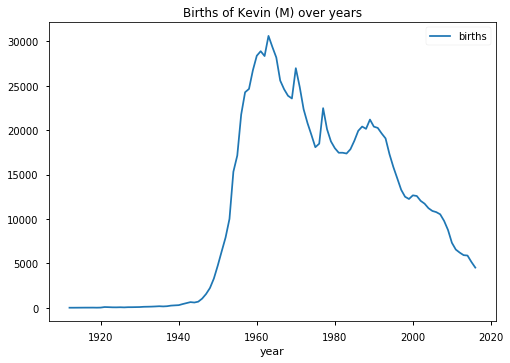

In [147]:
# plot the births column along with the years
selection_years.plot(title="Births of Kevin (M) over years");

### 2.2 按年份展示新生儿男女比例的变化

这里介绍一下 DataFrame 的 `pivot_table` 方法。它可以按照我们所指定的维度和方法生成一个全新的 DataFrame 报表：

In [148]:
# pivoting US data by years and gender and computing the sum of births
genders = us.pivot_table(index='year',
                         columns='gender',
                         values='births',
                         aggfunc=np.sum)
genders

gender,F,M
year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144533,110784
1887,145981,101415
...,...,...


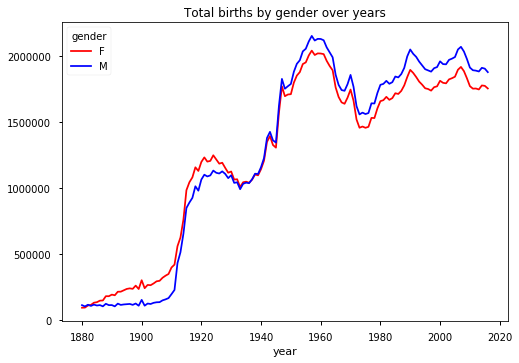

In [149]:
# plot number of births by gender over years
genders.plot(title="Total births by gender over years", color=['r', 'b']);

## 3. 评估名字的多样性

这里可以使用 `crosstab()` 方法，也可以采用上述的 `pivot_table`，可以看到在 1880 年名字的个数非常的少，但是在现在，名字的多样性有了很大的提升。

In [150]:
# number of different names by gender over years
diversity = pd.crosstab(us['year'], us['gender'])
diversity.head()

gender,F,M
year,,
1880,942,1058
1881,938,997
1882,1028,1099
1883,1054,1030
1884,1172,1125


In [151]:
diversity = us.pivot_table(index='year', columns='gender', values='births', aggfunc=len)
diversity.head()

gender,F,M
year,,
1880,942,1058
1881,938,997
1882,1028,1099
1883,1054,1030
1884,1172,1125


In [152]:
# nowadays
diversity.tail()

gender,F,M
year,,
2012,19486,14229
2013,19219,14034
2014,19169,14037
2015,19054,14009
2016,18757,14111


We can put every thing together in a single function.

In [153]:
# plot evolution of number of names over years
def plot_diversity(df):
    diversity = pd.crosstab(df['year'], df['gender'])
    diversity.plot(title="Evolution of names diversity by gender over years", color=['r', 'b']);

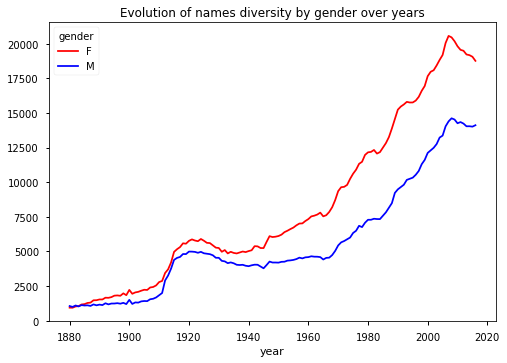

In [154]:
# US diversity
plot_diversity(us)

这样可以说明问题吗？

In [155]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
us = us.groupby(['year', 'gender']).apply(add_prop)

In [156]:
us.head()

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.078
1,Anna,F,2604,1880,0.029
2,Emma,F,2003,1880,0.022
3,Elizabeth,F,1939,1880,0.021
4,Minnie,F,1746,1880,0.019


In [157]:
us.groupby(['year', 'gender']).prop.sum()

year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
      M         1.0
1883  F         1.0
      M         1.0
               ... 
2013  F         1.0
      M         1.0
2014  F         1.0
      M         1.0
2015  F         1.0
      M         1.0
2016  F         1.0
      M         1.0
Name: prop, Length: 274, dtype: float64

In [158]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = us.groupby(['year', 'gender'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)
top1000

,name,gender,births,year,prop
0,Mary,F,7065,1880,7.764e-02
1,Anna,F,2604,1880,2.862e-02
2,Emma,F,2003,1880,2.201e-02
3,Elizabeth,F,1939,1880,2.131e-02
4,Minnie,F,1746,1880,1.919e-02
5,Margaret,F,1578,1880,1.734e-02
6,Ida,F,1472,1880,1.618e-02
7,Alice,F,1414,1880,1.554e-02
...,...,...,...,...,...
273869,Wesson,M,204,2016,1.085e-04


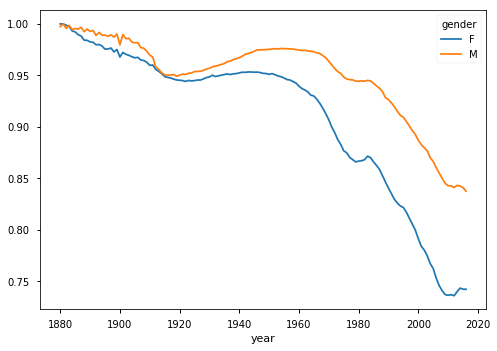

In [159]:
table = top1000.pivot_table('prop', index='year', columns='gender', aggfunc=np.sum)
table.plot()

## 4. 名字性别偏好的变迁

### 4.1 每个名字性别偏好的变迁

首先筛选那些被使用超过 10000 次的名字。

In [160]:
# find top names
top_names = us.groupby('name').sum()['births']
top_names = top_names.sort_values(ascending=False)
top_names = top_names[top_names >= 10000]
top_names

name
James       5159306
John        5127501
Robert      4829274
Michael     4359820
Mary        4135851
William     4103456
David       3613916
Joseph      2603475
             ...   
Kenna         10079
Jovan         10068
Tatyana       10061
Karly         10054
Catrina       10045
Randell       10031
Gilda         10022
Marisela      10012
Name: births, Length: 2469, dtype: int64

筛选 'name' 在其中的数据：

In [161]:
# data for top names
selection = us[us['name'].isin(top_names.index)]
selection

,name,gender,births,year,prop
0,Mary,F,7065,1880,7.764e-02
1,Anna,F,2604,1880,2.862e-02
2,Emma,F,2003,1880,2.201e-02
3,Elizabeth,F,1939,1880,2.131e-02
4,Minnie,F,1746,1880,1.919e-02
5,Margaret,F,1578,1880,1.734e-02
6,Ida,F,1472,1880,1.618e-02
7,Alice,F,1414,1880,1.554e-02
...,...,...,...,...,...
1891145,Madelyn,M,5,2016,2.659e-06


利用 `pivot_table` 方法，展示每个名字用在不同性别下新生儿的个数，并计算男性的占比：

In [162]:
# pivot by name and gender with the sum of births
ratio_name = selection.pivot_table(index='name',
                                     columns='gender',
                                     values='births',
                                     aggfunc=np.sum)
ratio_name["ratio"] = ratio_name["F"] / (ratio_name["F"] + ratio_name["M"])
ratio_name

gender,F,M,ratio
name,,,
Aaliyah,79367.0,89.0,0.999
Aaron,4269.0,568057.0,0.007
Abbey,17044.0,35.0,0.998
Abbie,21266.0,325.0,0.985
Abbigail,11286.0,5.0,1.000
Abby,56869.0,181.0,0.997
Abel,113.0,47412.0,0.002
Abigail,345728.0,621.0,0.998
...,...,...,...


然后我们通过 `plot` 方法展示个个名字的男性比例直方图，可以看到大多数名字是有 *性别偏好* 的，也就一个名字要么女孩用的多，要么男孩用的多。

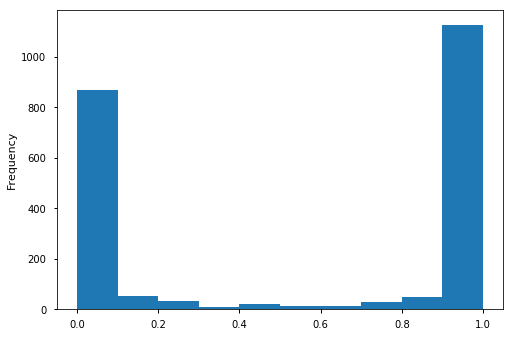

In [163]:
# distribution of F vs M ratio for top 1000 US names
ratio_name['ratio'].plot(kind='hist');

### 4.2 展示每个名字性别偏好的变化

首先筛选出一个特定的名字 *Leslie*.

In [164]:
# select US data for Leslie
selection = us[us["name"] == "Leslie"]
selection

,name,gender,births,year,prop
654,Leslie,F,8,1880,8.792e-05
1108,Leslie,M,79,1880,7.150e-04
2522,Leslie,F,11,1881,1.196e-04
3072,Leslie,M,92,1881,9.132e-04
4593,Leslie,F,9,1882,8.345e-05
5081,Leslie,M,122,1882,1.073e-03
6850,Leslie,F,7,1883,6.232e-05
7225,Leslie,M,120,1883,1.147e-03
...,...,...,...,...,...
1759787,Leslie,F,1111,2013,6.352e-04


再次采用 `pivot_table` 方法，按照年度为索引，按照性别为表头，计算男女个数的情况。

In [165]:
# evolution of births by gender
evolution_gender = selection.pivot_table(index='year',
                                         columns='gender',
                                         values='births')
evolution_gender

gender,F,M
year,,
1880,8,79
1881,11,92
1882,9,122
1883,7,120
1884,15,125
1885,10,122
1886,8,136
1887,12,166
...,...,...


然后我们计算一个每年该名字用于男孩女孩的比例：

Then we compute the F and M ratio by dividing the births by the sum of each line (*axis=1*) along the index (*axis=0*).

In [166]:
# gender evolution over years
evolution_gender = evolution_gender.div(evolution_gender.sum(axis=1), axis=0)
evolution_gender

gender,F,M
year,,
1880,0.092,0.908
1881,0.107,0.893
1882,0.069,0.931
1883,0.055,0.945
1884,0.107,0.893
1885,0.076,0.924
1886,0.056,0.944
1887,0.067,0.933
...,...,...


Put everything in a function

In [167]:
# plot gender ratio evolution of years
def plot_transname(df, name):
    selection = df[df["name"] == name]
    gender = selection.pivot_table(index='year',
                                   columns='gender',
                                   values='births')
    gender = gender.div(gender.sum(axis=1), axis=0)
    gender.plot(title="Evolution proportion of {} by gender over years".format(name), style={'M': 'b', 'F': 'r'});

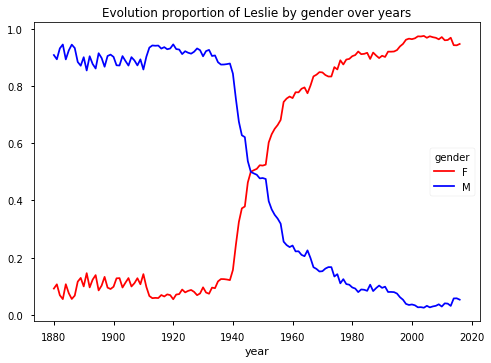

In [168]:
# gender evolution of US Donnie
plot_transname(us, "Leslie")

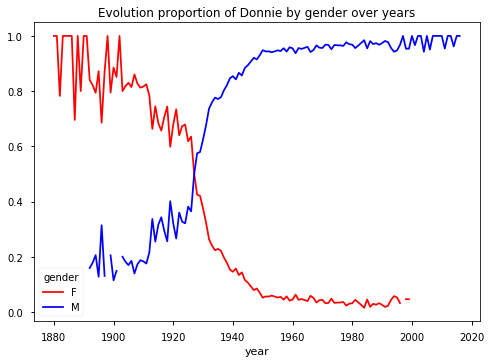

In [169]:
# gender evolution of US Donnie
plot_transname(us, "Donnie")

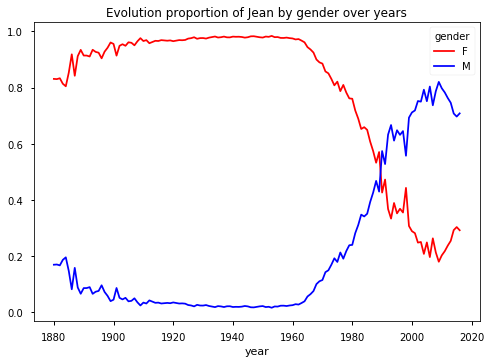

In [170]:
plot_transname(us, 'Jean')

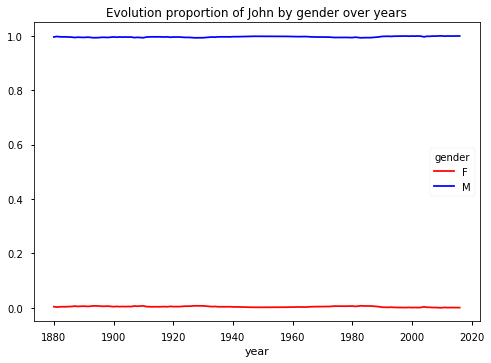

In [171]:
plot_transname(us, 'John')

## 5. 总结

1. DataFrame 是一个表格，二维数据
2. Series 是一列数据，一维数据
3. read_csv 可以加载数据
4. head() tail() info() describe() 可以看到数据的该来
5. 逻辑运算符可以筛选数据
6. plot 可以可视化数据
7. pivot_table 可以做各种维度的报表，是表格数据统计分析的利器
8. sort group 可以方便的把数据进行排序和分组

更多参考如下：

**Data representation**
- <a href="https://pandas.pydata.org/pandas-docs/stable/api.html#series">Series</a>: 1D
- <a href="https://pandas.pydata.org/pandas-docs/stable/api.html#dataframe">DataFrame</a>: 2D

**Loading data** with <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">*read_csv()*</a>
- header
- names
- sep
- encoding
- converters

**Getting information**
- *index*: Series and DataFrame index
- *columns*: DataFrame column
- *shape*: Series and DataFrame dimensions
- *info()*: DataFrame informations
- *values*: Index and Series values
- *unique()*: Series unique values
- *nunique()*: Series number of unique values

**Selecting data**
- *head()* and *tail()*
- Column accessing
- Row accessing
- Fancy indexing
- Logical masking

**Indexing and merging data**
- <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html">*set_index()*</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html">*reset_index()*</a>
- <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html">*append()*</a> and <a href="http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.concat.html">*concat()*</a>

**Computing over data**
- *sum()*
- *str.len()*, *str.startswith()* and *str.contains()*
- <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html">*apply()*</a> and *lambda*
- *isin()*
- *div()*

**Organizing data**
- *transpose()* or *T*
- <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html">*sort_values()*</a>
- <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html">*groupby()*</a>
- <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html">*pivot_table()*</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html">*crosstab()*</a>

**Displaying data**
- <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html">*plot()*</a>